# Airfoil experiments
All data is available in the repository

In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
from notebook_network_size import find_best_network_size_notebook
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


# Setup

In [2]:
qmc_points = np.loadtxt('../sobol_6_8000.txt')
qmc_points = qmc_points[1:].reshape((8000,6))

large_qmc_points = np.loadtxt('../sobol_6_131072.txt')
all_points = qmc_points.copy()
forces = np.array(np.loadtxt('../force_6_params.dat'))


N = min(qmc_points.shape[0], forces.shape[0])
qmc_points = qmc_points[:N,:]
forces  = forces[:N,:]


input_size=6
train_size=128
validation_size=128

epochs = 500000


airfoils_network = [12, 12, 10, 12, 10, 12, 10, 10, 12,1]


# Network sizes

Find the optimal network size


Config 4 x 6 ([0 x 0] / [4 x 4])
Training and postprocessing took: 4169.638660669327 seconds (69.49397767782212 minutes) (1.1582329612970352 hours)
Config 4 x 12 ([0 x 1] / [4 x 4])
Training and postprocessing took: 4222.8033492565155 seconds (70.38005582094192 minutes) (1.173000930349032 hours)
Config 4 x 24 ([0 x 2] / [4 x 4])
Training and postprocessing took: 4369.747181653976 seconds (72.82911969423294 minutes) (1.213818661570549 hours)
Config 4 x 48 ([0 x 3] / [4 x 4])
Training and postprocessing took: 4553.94184756279 seconds (75.89903079271316 minutes) (1.2649838465452194 hours)
Config 8 x 6 ([1 x 0] / [4 x 4])
Training and postprocessing took: 5748.470389842987 seconds (95.80783983071645 minutes) (1.5967973305119407 hours)
Config 8 x 12 ([1 x 1] / [4 x 4])
Training and postprocessing took: 6142.488917589188 seconds (102.37481529315313 minutes) (1.7062469215525522 hours)
Config 8 x 24 ([1 x 2] / [4 x 4])
Training and postprocessing took: 6333.061476230621 seconds (105.5510246038

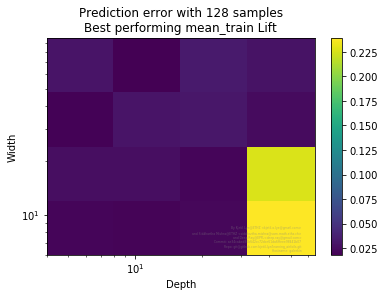

Memory usage: 2770496


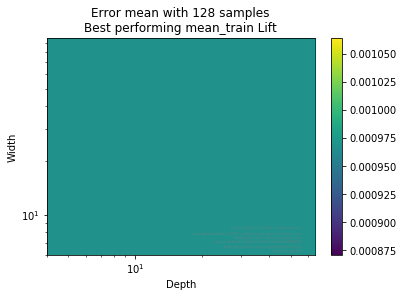

Memory usage: 2770496


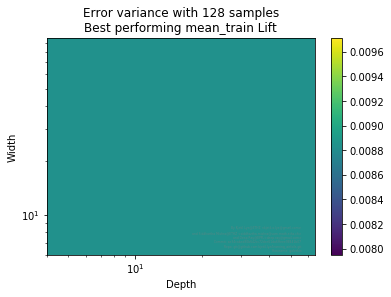

Memory usage: 2770496


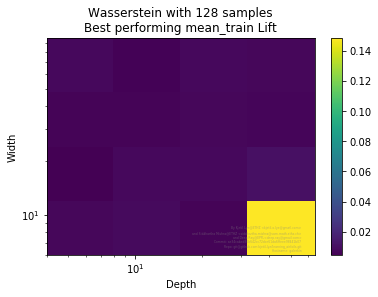

Memory usage: 2770496


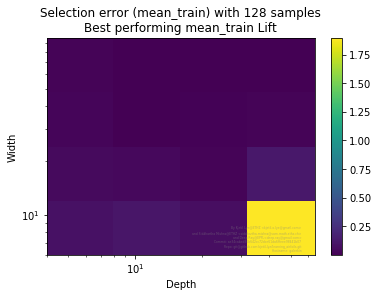

Memory usage: 2770496
Config 4 x 6 ([0 x 0] / [4 x 4])
Training and postprocessing took: 11516.265256404877 seconds (191.9377542734146 minutes) (3.1989625712235767 hours)
Config 4 x 12 ([0 x 1] / [4 x 4])


KeyboardInterrupt: 

In [3]:
force_names=['Lift', 'Drag']

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}

loss = "mean_squared_error"

selections = {}
selections['Best performing'] = ['mean_train', 'ray_prediction', 'wasserstein_train', 'train']
selections['Emperically optimal'] = ['mean', 'mean_tail', 'prediction', 'wasserstein']



class TrainingFunction(object):
    def __init__(self, *, parameters, samples, title):
        self.parameters = parameters
        self.samples=samples
        self.title = title


    def __call__(self, network_information, output_information):
        showAndSave.prefix='%s_%s_%s_ts_%d_bs_%d' %(self.title,
            network_information.optimizer.__name__,
            network_information.loss,
            network_information.batch_size,
            network_information.train_size)

        get_network_and_postprocess(self.parameters, self.samples,
                    network_information = network_information,
                    output_information = output_information)

training_sizes = [128, 256]
for selection_type in selections.keys():
    display(HTML("<h1>%s</h1>" % selection_type))
    
    for selection in selections[selection_type]:
   
        display(HTML("<h2>%s</h2>" % selection))
        
   

        

        number_of_widths = 4
        number_of_depths = 4



        for n, force_name in enumerate(force_names):
            display(HTML("<h3>%s</h3>" % force_name))
            for train_size in training_sizes:
                parameters = qmc_points
                samples = forces[:, n+1]
                title = '%s %s %s' % (selection_type, selection, force_name)
                short_title = force_name
                run_function = TrainingFunction(parameters=parameters,
                    samples = samples,
                    title = title)


                optimizers = {"SGD": keras.optimizers.SGD}

                losses = ["mean_squared_error"]

                optimizer = 'SGD'
                loss = losses[0]
                tables = Tables.make_default()

                network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs,
                                                         network=None, train_size=None,
                                                         validation_size=None,
                                                        loss=loss, tries=5, 
                                                        selection=selection)


                title = '%s %s %s' % (selection_type, selection, force_name)
                short_title = force_name
                output_information = OutputInformation(tables=tables, title=title,
                                                      short_title=title, enable_plotting=False)


                selection_error, error_map = find_best_network_size_notebook(network_information = network_information,
                    output_information = output_information,
                    train_size = train_size,
                    run_function = run_function,
                    number_of_depths = number_of_depths,
                    number_of_widths = number_of_widths,
                    base_title = title,
                    only_selection = False)
                
                


# One network per variable

In [ ]:
force_names=['Lift', 'Drag']
batch_sizes=[train_size]
train_sizes = [16, 32, train_size]

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}

losses = ["mean_squared_error", "mean_absolute_error"]
selections = ['mean', 'mean_train', 'mean_tail', 'prediction', 'train', 'ray_prediction']
for selection in selections:
    display(HTML("<h1>%s</h1>" % selection))
    for optimizer in optimizers.keys():
        for loss in losses:
            display(HTML("<h1>{} with {}</h1>".format(optimizer, loss)))
    
            for batch_size in batch_sizes:
                tables = Tables.make_default()
                
                for (n, f) in enumerate(force_names):
                    seed_random_number(random_seed)
                    network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                             network=airfoils_network, train_size=train_size,
                                                             validation_size=validation_size,
                                                            loss=loss, 
                                                            large_integration_points=large_qmc_points,
                                                            selection=selection, tries=10)
                    
                    output_information = OutputInformation(tables=tables, title=force_names[n],
                                                          short_title=force_names[n], enable_plotting=True)
                    showAndSave.prefix='airfoil_%s_%s_%s_%s_ts_%d_bs_%d' %(selection, optimizer, loss, f,batch_size, train_size)
                    get_network_and_postprocess(qmc_points, forces[:,n+1], network_information = network_information,
                        output_information = output_information)
                
                showAndSave.prefix='airfoil_%s_%s_%s_all_ts_%d_bs_%d' %(selection, optimizer, loss, batch_size, train_size)
                tables.write_tables()
      

# As a function of training errors

In [ ]:
force_names=['Lift', 'Drag']
epochs = 500000

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}
loss = "mean_squared_error"
optimizer='SGD'
for n in range(len(force_names)):
    f=force_names[n]
    tables = Tables.make_default()
    def run_function(network_information, output_information):
        showAndSave.prefix='airfoil_convergence_%s_%s_%s_ts_%d_bs_%d' %(optimizer, loss, f, 
                                                                        network_information.batch_size,
                                                                        network_information.train_size)
        showAndSave.silent=True
        print_comparison_table.silent = True
        get_network_and_postprocess(qmc_points, forces[:,n+1], network_information = network_information,
            output_information = output_information)
        
        showAndSave.prefix='airfoil_convergence_result_%s_%s_%s' %(optimizer, loss, f)
        
        
    network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                     network=airfoils_network, train_size=None,
                                                     validation_size=None,
                                                    loss=loss, 
                                                    large_integration_points=None,
                                                    tries=5)
            
    output_information = OutputInformation(tables=tables, title=force_names[n],
                                          short_title=force_names[n])
    
    plot_train_size_convergence(network_information,
                               output_information, 
                               run_function,
                               qmc_points.shape[0]
                               )

In [ ]:
print(output_information.__dict__)

In [ ]:
force_names=['Lift', 'Drag']
epochs = 5

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}
loss = "mean_squared_error"
optimizer='SGD'
selections = ['mean', 'mean_train', 'mean_tail', 'prediction']
for selection in selections:
    display(HTML("<h1>%s</h1>" % selection))
    for n in range(len(force_names)):
        f=force_names[n]
        tables = Tables.make_default()
        def run_function(network_information, output_information):
            showAndSave.prefix='airfoil_convergence_%s_%s_%s_%s_ts_%d_bs_%d' %(selection, optimizer, loss, f, 
                                                                            network_information.batch_size,
                                                                            network_information.train_size)
            showAndSave.silent=True
            print_comparison_table.silent = True
            get_network_and_postprocess(qmc_points, forces[:,n+1], network_information = network_information,
                output_information = output_information)
            
            showAndSave.prefix='airfoil_convergence_result_%s_%s_%s_%s' %(selection, optimizer, loss, f)
            
            
        network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                         network=airfoils_network, train_size=None,
                                                         validation_size=None,
                                                        loss=loss, 
                                                        selection=selection,
                                                        large_integration_points=None,
                                                        tries=10)
                
        output_information = OutputInformation(tables=tables, title=force_names[n],
                                              short_title=force_names[n])
        
        plot_train_size_convergence(network_information,
                                   output_information, 
                                   run_function,
                                   qmc_points.shape[0]
                                   )